In [ ]:
! pip install langchain
#this will install the three components of LangChain : langchain core / langchain community/langchain
! pip install langchain-huggingface
! pip install langchain_mistralai

In [ ]:
import os
#os.environ["OPENAI_API_KEY"]="sk-abcd1234efgh5678abcd1234efgh5678abcd1234"

In [ ]:
#from langchain_openai import ChatOpenAI
#llm = ChatOpenAI()

In [ ]:
import os
from langchain_huggingface import HuggingFacePipeline
from transformers import pipeline

# Load a Hugging Face model (for example, "gpt2" or any other available model)
model_name = "gpt2"  # You can choose any compatible model
hf_pipeline = pipeline("text-generation", model=model_name)

# Create a LangChain HuggingFacePipeline
llm = HuggingFacePipeline(pipeline=hf_pipeline)

# Invoke the model with a prompt
response = llm("what is docker?")
print(response)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


what is docker? I hope this helps you understand everything you need to know about Docker.


In [ ]:
import os
os.environ["MISTRAL_API_KEY"]=""

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_mistralai.chat_models import ChatMistralAI

# Initialize the chat model
llm = ChatMistralAI(model="mistral-small")
# you can use models provided in documentations: mistral-small
#mistral-medium and others
#check :https://console.mistral.ai/limits/
# Prepare a message
messages = [HumanMessage(content="what is docker")]

# Invoke the chat model
response = llm.invoke(messages)
print(response)

content='Docker is an open-source platform that automates the deployment, scaling, and management of applications using containerization technology. Containerization allows applications to be packaged with their dependencies and configurations, providing a portable and consistent runtime environment across different computing environments.\n\nWith Docker, developers can create, test, and deploy applications in containers that can run on any system that supports Docker, without worrying about compatibility issues. Docker also provides tools for managing and orchestrating containers, making it easier to scale and manage applications in production environments.\n\nDocker consists of several components, including the Docker Engine, which is responsible for running and managing containers, and the Docker Hub, which is a cloud-based registry for sharing and distributing Docker images. Docker images are lightweight, standalone, and executable packages that include an application and its depen

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages([
    ("system","you are a   german translator for everything the user says , in case user provided the full sentence in german say only \"the sentence is already in german\" "),
    ("user","{input}")
])

In [ ]:
#create the chain
chain= prompt | llm

In [ ]:
chain.invoke({
    "input": "Was ist heute "
})

AIMessage(content='the sentence is already in German. ("What is today" in English)', additional_kwargs={}, response_metadata={'token_usage': {'prompt_tokens': 48, 'total_tokens': 63, 'completion_tokens': 15}, 'model': 'mistral-small', 'finish_reason': 'stop'}, id='run-e9d284e9-e39f-4819-8d87-0d514b5d8db4-0', usage_metadata={'input_tokens': 48, 'output_tokens': 15, 'total_tokens': 63})

In [ ]:
#add output parser to the chain
#specify the output result of the chain => example instead of AIMessage Object , I want a string
#as a result
from langchain_core.output_parsers import StrOutputParser
output_parser=StrOutputParser()

In [ ]:
chain  = prompt |llm |output_parser

In [ ]:
chain.invoke({
    "input":"I want to play with doogs"
})

'The sentence you provided "I want to play with doogs" appears to be in English. In German, it could be translated as "Ich möchte mit Hunden spielen".'

In [ ]:
#retrieval chain
! pip install beautifulsoup4

In [ ]:
#vector store
! pip install faiss-cpu
!pip install langchain_community



In [ ]:
from langchain_community.document_loaders import WebBaseLoader
#loader = WebBaseLoader("https://insatpress.tn/2023/06/02/ains-artificial-intelligence-national-summit/?utm_source=rss&utm_medium=rss&utm_campaign=ains-artificial-intelligence-national-summit#:~:text=Du%208%20au%2010%20Juin,par%20IEEE%20INSAT%20CS%20Chapter.")
loader = WebBaseLoader("https://blog.langchain.dev/langchain-v0-1-0/")
docs = loader.load()

In [ ]:
docs

[Document(metadata={'source': 'https://blog.langchain.dev/langchain-v0-1-0/', 'title': 'LangChain v0.1.0', 'language': 'en'}, page_content='\n\n\nLangChain v0.1.0\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCase Studies\n\n\n\n\nIn the Loop\n\n\n\n\nLangChain\n\n\n\n\nDocs\n\n\n\n\nChangelog\n\n\n\n\n\nSign in\nSubscribe\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLangChain v0.1.0\n\nBy LangChain\n10 min read\nJan 8, 2024\n\n\n\n\n\nToday we‚Äôre excited to announce the release of langchain 0.1.0, our first stable version. It is fully backwards compatible, comes in both Python and JavaScript, and comes with improved focus through both functionality and documentation. A stable version of LangChain helps us earn developer trust and gives us the ability to evolve the library systematically and safely.Python GitHub DiscussionPython v0.1.0 GuidesJS v0.1.0 GuidesYouTube WalkthroughIntrodu

In [ ]:
#embeddings model to add to the vector store

from langchain_mistralai.embeddings import MistralAIEmbeddings

In [ ]:
#initialize the Embeddings
embeddings = MistralAIEmbeddings()

/usr/local/lib/python3.10/dist-packages/langchain_mistralai/embeddings.py:169: UserWarning: Could not download mistral tokenizer from Huggingface for calculating batch sizes. Set a Huggingface token via the HF_TOKEN environment variable to download the real tokenizer. Falling back to a dummy tokenizer that uses `len()`.
  warnings.warn(


In [ ]:
text_to_embed="what is langchain"
embedding_vector=embeddings.embed_query(text_to_embed)
print(f"embedding vector{embedding_vector}")

embedding vector[-0.0411376953125, -0.022186279296875, 0.023681640625, -0.0129852294921875, 0.031829833984375, -0.00836181640625, -0.0195465087890625, -0.019500732421875, 0.0199432373046875, -0.0242919921875, -0.041412353515625, -0.0008683204650878906, -0.007251739501953125, -0.0249176025390625, -0.019805908203125, 0.01824951171875, -0.002849578857421875, 0.01812744140625, 0.01032257080078125, 0.016082763671875, -0.0266876220703125, -0.01010894775390625, 0.002208709716796875, 0.016265869140625, 0.0115509033203125, 0.045562744140625, 0.0020198822021484375, -0.059234619140625, -0.001636505126953125, -0.01349639892578125, -0.00788116455078125, -0.033172607421875, -0.0435791015625, 0.004116058349609375, -0.006000518798828125, -0.034698486328125, 0.0125579833984375, 0.02203369140625, 0.0172882080078125, -0.004787445068359375, 0.002216339111328125, -0.01788330078125, 0.00910186767578125, -0.018402099609375, -0.008270263671875, -0.032135009765625, 0.0196533203125, -0.00882720947265625, 0.0422

In [ ]:
from langchain_community.vectorstores import FAISS
#FAISS (Facebook AI Similarity Search) : open source library for efficient similarity serach
#and clustering between dense vectors
from langchain.text_splitter import RecursiveCharacterTextSplitter
#used for splitting text into smaller chunks based on character count or other criteria.
#create vector store with shorter documents to keep only docs who are relevant to questions


In [ ]:
text_splitter=RecursiveCharacterTextSplitter()
#your docs can be splitted into smalller documents
documents= text_splitter.split_documents(docs)

vectorstore= FAISS.from_documents(documents,embeddings)

In [ ]:
from langchain.chains.combine_documents import create_stuff_documents_chain

template="""
Answer the following question based only  on the provided context
<context>
{context}
</context>
Question:{input}
"""

prompt=ChatPromptTemplate.from_template(template)
document_chain=create_stuff_documents_chain(llm,prompt)

In [ ]:
from langchain_core.documents import Document

document_chain.invoke({
    "input":"what is langchain 0.1.0?",
    "context":[Document(page_content="langchain 0.1.0 is  the new verison of llm app development framework")]
})

"Based on the provided context, Langchain 0.1.0 is the latest version of the LLM (likely referring to a programming language or framework) app development framework. It's a tool that developers use to build applications, and the new version may include updates, bug fixes, and new features to help improve the development process. However, the context does not provide specific details about what has changed or been added in this version of Langchain."

In [ ]:
#create retrieval chains
from langchain.chains import create_retrieval_chain
 #intialize our retriever which is going to come from the vector store that we createed
retriever=vectorstore.as_retriever()
retrieval_chain=create_retrieval_chain(retriever,document_chain)

In [ ]:
response = retrieval_chain.invoke({
    "input":"what is new in langchain 0.1.0?"

})
print(response["answer"])

Langchain 0.1.0 is the first stable version that comes with improved focus through both functionality and documentation. It is fully backwards compatible, comes in both Python and JavaScript, and was released after making significant changes to the package architecture to better organize the project and strengthen the foundation. The new versioning standard will communicate clearly if breaking changes are made and give an avenue for officially deprecating and deleting old code, reducing bloat. Langchain-core contains the main abstractions, interfaces, and core functionality, and has been following a stricter versioning policy for a little over a month now.


In [ ]:
#practical IMPORTAANTTTTTT
#convert it to conversational retrieval chain
#it will consider the history of the conversation
#the moment it s going to fetch all of the documents that are relevant to the question , it's going  the docs not only relevant to the question
#but also the  docs relevant to the conversation
#second of all it s going to take into account the history in the language model prompt


In [ ]:
#create the history aware retriever : the documents relevant to the conversation
from langchain.chains import create_history_aware_retriever
from langchain_core.prompts import MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages([
    MessagesPlaceholder(variable_name="chat_history"),
    ("user","{input}"),
    ("user","Given the above conversation, generate a search query to look up in order to get information relevant to the conversation")
])
retrieval_chain= create_history_aware_retriever(llm,retriever,prompt)
#gives the relevant documents to the chat history

In [ ]:
from langchain_core.messages import HumanMessage,AIMessage
chat_history=[
    HumanMessage(content="Is there anything new in langchain 1.0.1?"),
    AIMessage(content="Yes!")
]

In [ ]:
retrieval_chain.invoke(
    {
        "chat history":chat_history,
        "input":"Tell me more about it"
    }
)

Stopped at 42:48
link :https://www.youtube.com/watch?v=LBNpyjcbv0o&list=PLMVV8yyL2GN_n41v1ESBvDHwMbYYhlAh1

In [ ]:
#RAG Chain with History
#the version to use in the project
from langchain.chains import create_retrieval_chain
#structure the input that will be sent to the language model
prompt= ChatPromptTemplate.from_messages([
    ("system","Answer the user's questions based  on the below context:\n\n{context}"),
    MessagesPlaceholder(variable_name="chat_history"),
    ("user","{input}")
])
# Below we use create_stuff_documents_chain to feed all retrieved context # into the LLM.
document_chain = create_stuff_documents_chain(llm,prompt)

conversational_retrieval_chain = create_retrieval_chain(retriever,document_chain)
#retriever: This is likely an instance of a retriever that is responsible for fetching relevant documents based on the user's query.
#document_chain: The document chain created in the previous step, which will process the retrieved documents and generate answers based on the context and user input.

![conversational_retrieval_chain.png](
  
)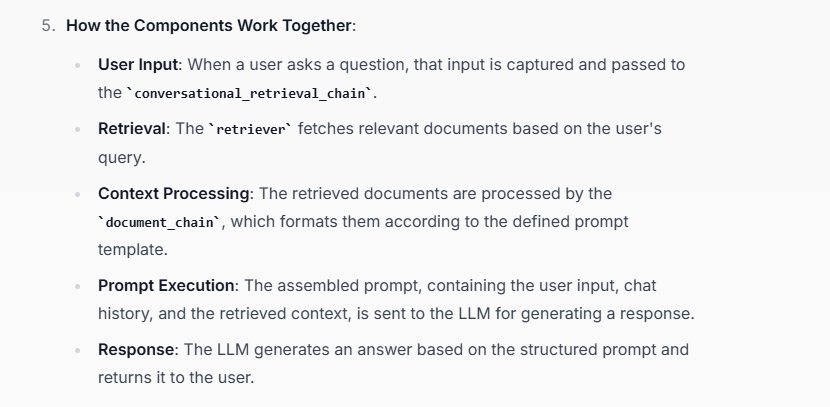

In [ ]:
response = conversational_retrieval_chain.invoke({
    'chat_history':[],
    'input':'what is langchain 0.1.0 about ?'
})

{'chat_history': [],
 'input': 'what is langchain 0.1.0 about ?',
 'context': [Document(metadata={'source': 'https://blog.langchain.dev/langchain-v0-1-0/', 'title': 'LangChain v0.1.0', 'language': 'en'}, page_content='Today we‚Äôre excited to announce the release of langchain 0.1.0, our first stable version. It is fully backwards compatible, comes in both Python and JavaScript, and comes with improved focus through both functionality and documentation. A stable version of LangChain helps us earn developer trust and gives us the ability to evolve the library systematically and safely.Python GitHub DiscussionPython v0.1.0 GuidesJS v0.1.0 GuidesYouTube WalkthroughIntroductionLangChain has been around for a little over a year and has changed a lot as it‚Äôs grown to become the default framework for building LLM applications. As we previewed a month ago, we recently decided to make significant changes to the\xa0 LangChain package architecture in order to better organize the project and stre

In [ ]:
chat_history=[
    HumanMessage("Hello what's up?"),
    AIMessage("I'm fine , would you want to hear about something?"),
    HumanMessage("I m starting to build some LLM applications but I m finding difficulties , I m using non stable frameworks")
]
response = conversational_retrieval_chain.invoke(
    {
        "input":"Could you tell me about an application to build LLM?",
        "chat_history":chat_history
    }
)

In [ ]:
response

{'input': 'Could you tell me about an application to build LLM?',
 'chat_history': [HumanMessage(content="Hello what's up?", additional_kwargs={}, response_metadata={}),
  AIMessage(content="I'm fine , would you want to hear about something?", additional_kwargs={}, response_metadata={}),
  HumanMessage(content='I m starting to build some LLM applications but I m finding difficulties , I m using non stable frameworks', additional_kwargs={}, response_metadata={})],
 'context': [Document(metadata={'source': 'https://blog.langchain.dev/langchain-v0-1-0/', 'title': 'LangChain v0.1.0', 'language': 'en'}, page_content='and return it. If you want to modify the logic - no problem! Because it‚Äôs all written in LCEL it‚Äôs easy to modify part of it without having to subclass anything or override any methods.There are a lot of chains in LangChain, and a lot of them are heavily used. We will not deprecate the legacy version of the chain until an alternative constructor function exists and has been